# <center><b>Exoplanet Data Analysis</b></center>

## <center>Assignment-2</center>



## About the Dataset

The Dataset is about the various planets that are detected by the various NASA missions like Kepler , TESS etc. These exoplanets are detected by various methodes like Radial Velocity Method, Direct Imaging and Microlensing.

The data set is available at = <a href = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS">NASA Exoplanet Data</a>

In [3]:
from IPython.display import IFrame
IFrame("https://exoplanetarchive.ipac.caltech.edu/docs/data.html", 900,500)


## Research Question 

<B><U> Through this EDA I want to understand the some of the most effective ways to detect exoplanets and about the habitable planets and their various characterstics </B></U>

# References

Some of the previous works are :

<B>Planetary Candidates Observed by Kepler. VIII. A Fully Automated Catalog With Measured Completeness and Reliability Based on Data Release 25</B>

<B>The Occurrence of Rocky Habitable Zone Planets Around Solar-Like Stars from Kepler Data</B>



## 

## Hypothesis

In this dataset we look for exoplanet data and for habitable planets we made the hypothesis that most importrant factors are Equilibrium Temperature of Planet and star and the presence in the some threshold distance called goldilock zone

In [4]:
# Importing Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [5]:
# Reading the data from the file

exo_planet = pd.read_csv('exoplanets.csv')

exo_planet.head()

,Unnamed: 0,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
3,3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14


In [6]:
for columns in exo_planet.columns:
    print(columns)

Unnamed: 0
pl_name
hostname
default_flag
sy_snum
sy_pnum
discoverymethod
disc_year
disc_facility
soltype
pl_controv_flag
pl_refname
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_rade
pl_radeerr1
pl_radeerr2
pl_radelim
pl_radj
pl_radjerr1
pl_radjerr2
pl_radjlim
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov
pl_orbeccen
pl_orbeccenerr1
pl_orbeccenerr2
pl_orbeccenlim
pl_insol
pl_insolerr1
pl_insolerr2
pl_insollim
pl_eqt
pl_eqterr1
pl_eqterr2
pl_eqtlim
ttv_flag
st_refname
st_spectype
st_teff
st_tefferr1
st_tefferr2
st_tefflim
st_rad
st_raderr1
st_raderr2
st_radlim
st_mass
st_masserr1
st_masserr2
st_masslim
st_met
st_meterr1
st_meterr2
st_metlim
st_metratio
st_logg
st_loggerr1
st_loggerr2
st_logglim
sy_refname
rastr
ra
decstr
dec
sy_dist
sy_disterr1
sy_disterr2
sy_vmag
sy_vmagerr1
sy_vmagerr2
sy_kmag
sy_kmagerr1
sy_kmagerr2
sy_gaiamag
sy_gaiamagerr1
sy_gaiamager

In [23]:
exo_planet.shape

(32552, 93)

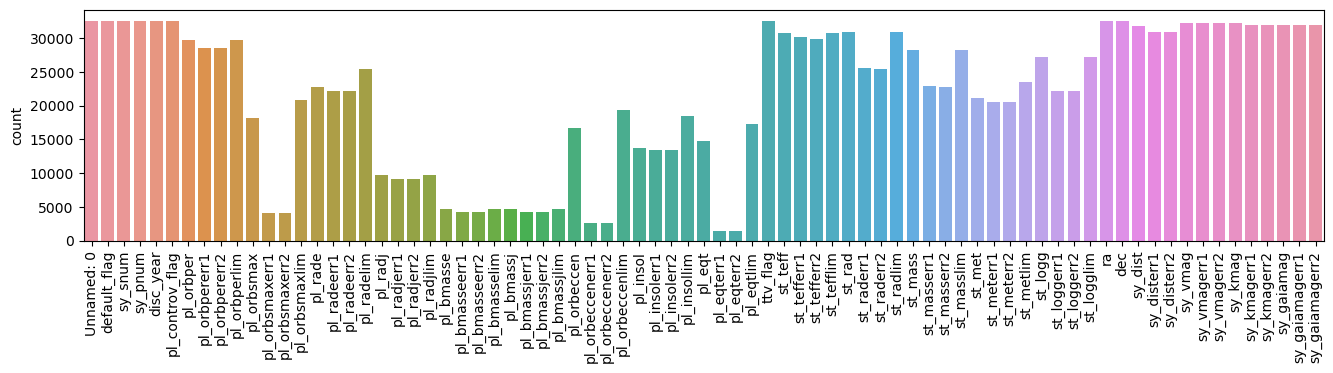

In [7]:
fig1 , ax = plt.subplots(1,1,figsize=(16,3),dpi=100)
sns.countplot(data = exo_planet,ax=ax)
ax.tick_params(axis='x',rotation=90)

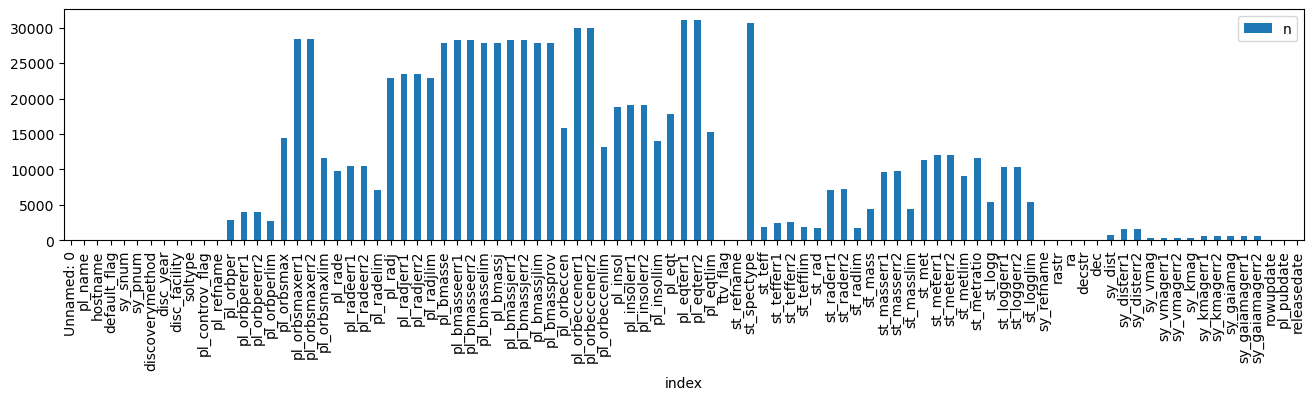

In [8]:
# Null DATA Visulaisation

fig2,ax = plt.subplots(1,1,figsize=(16,3),dpi=100)

exo_planet.isnull().sum().reset_index(name='n').plot.bar(x='index',y='n',rot=90,ax=ax)
ax.tick_params(axis='x',rotation=90)

<AxesSubplot:>

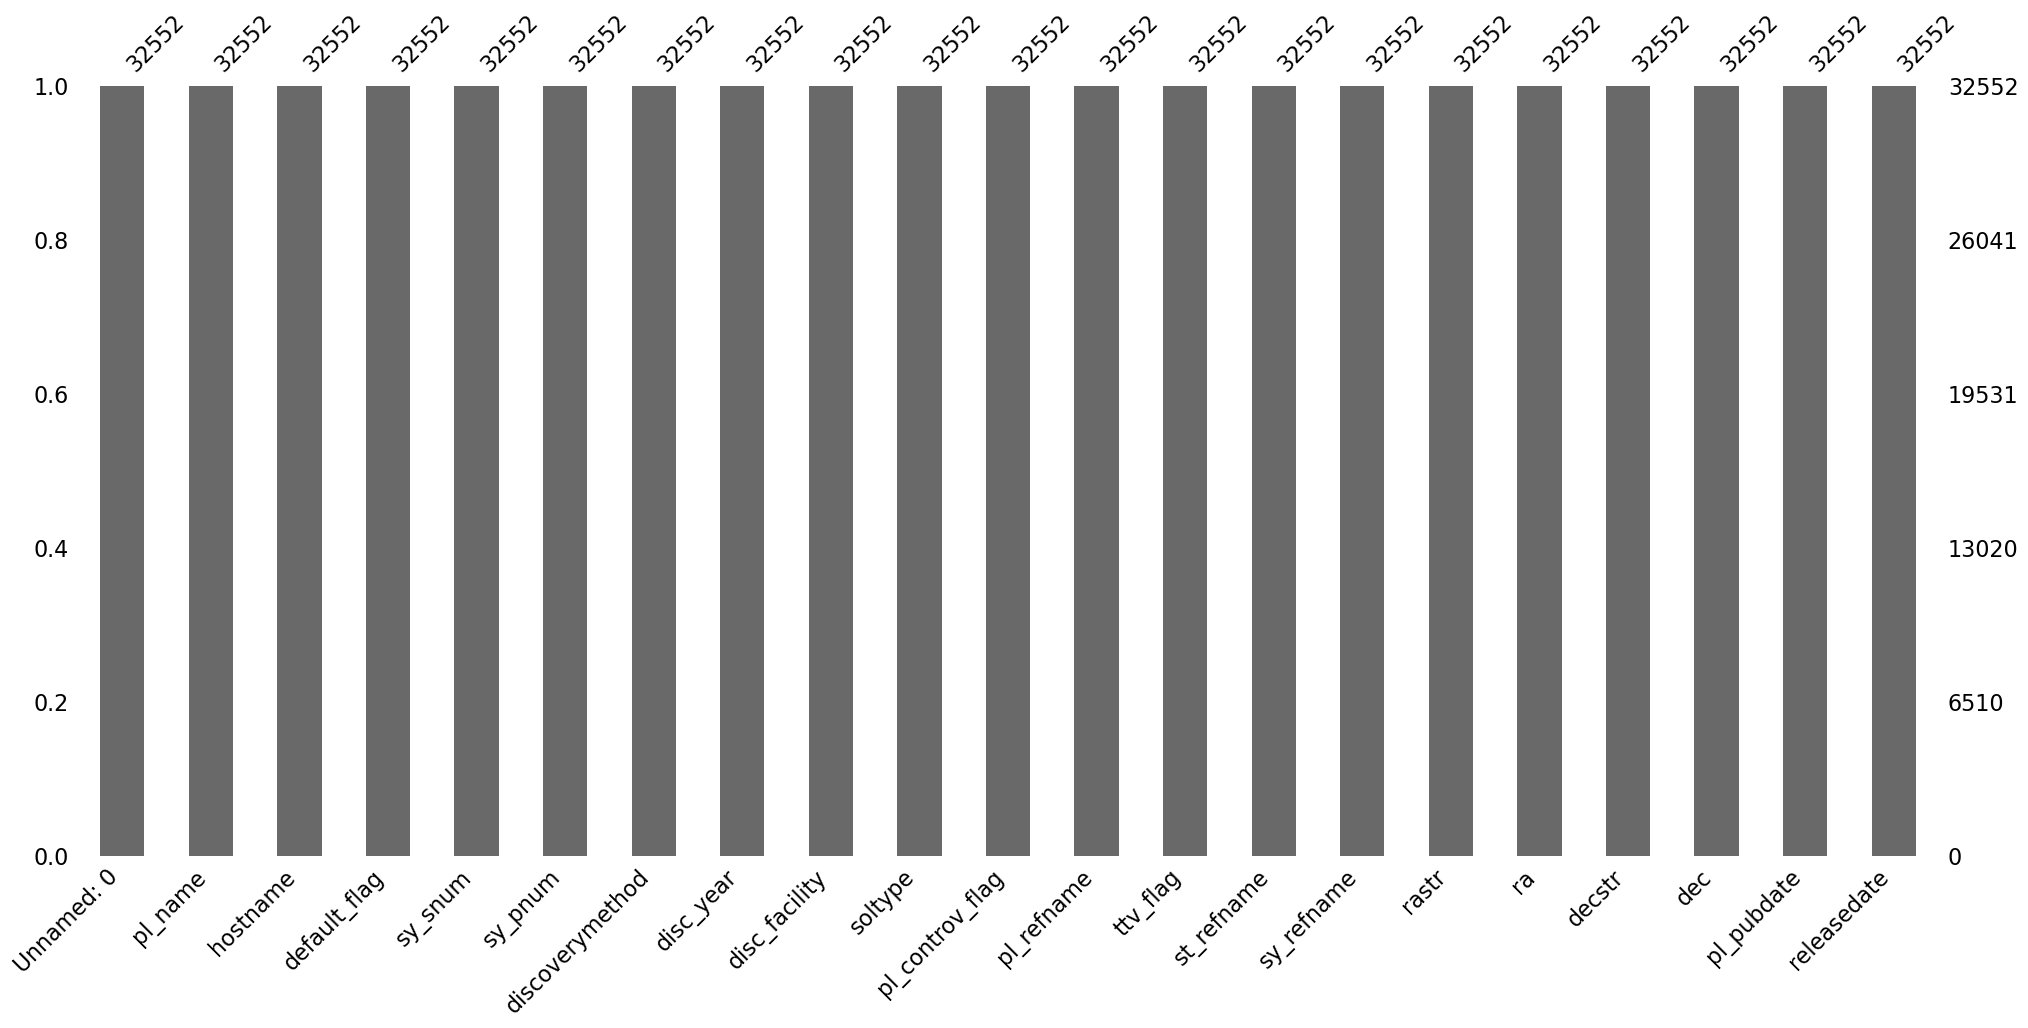

In [9]:
filter_data = exo_planet.dropna(axis=1)

msno.bar(filter_data)

## Ananlysis of Discovery Facility

In [10]:
print("No. of unique astro observatory facility: ",len(pd.unique(exo_planet['disc_facility'])))

No. of unique astro observatory facility:  65


<AxesSubplot:>

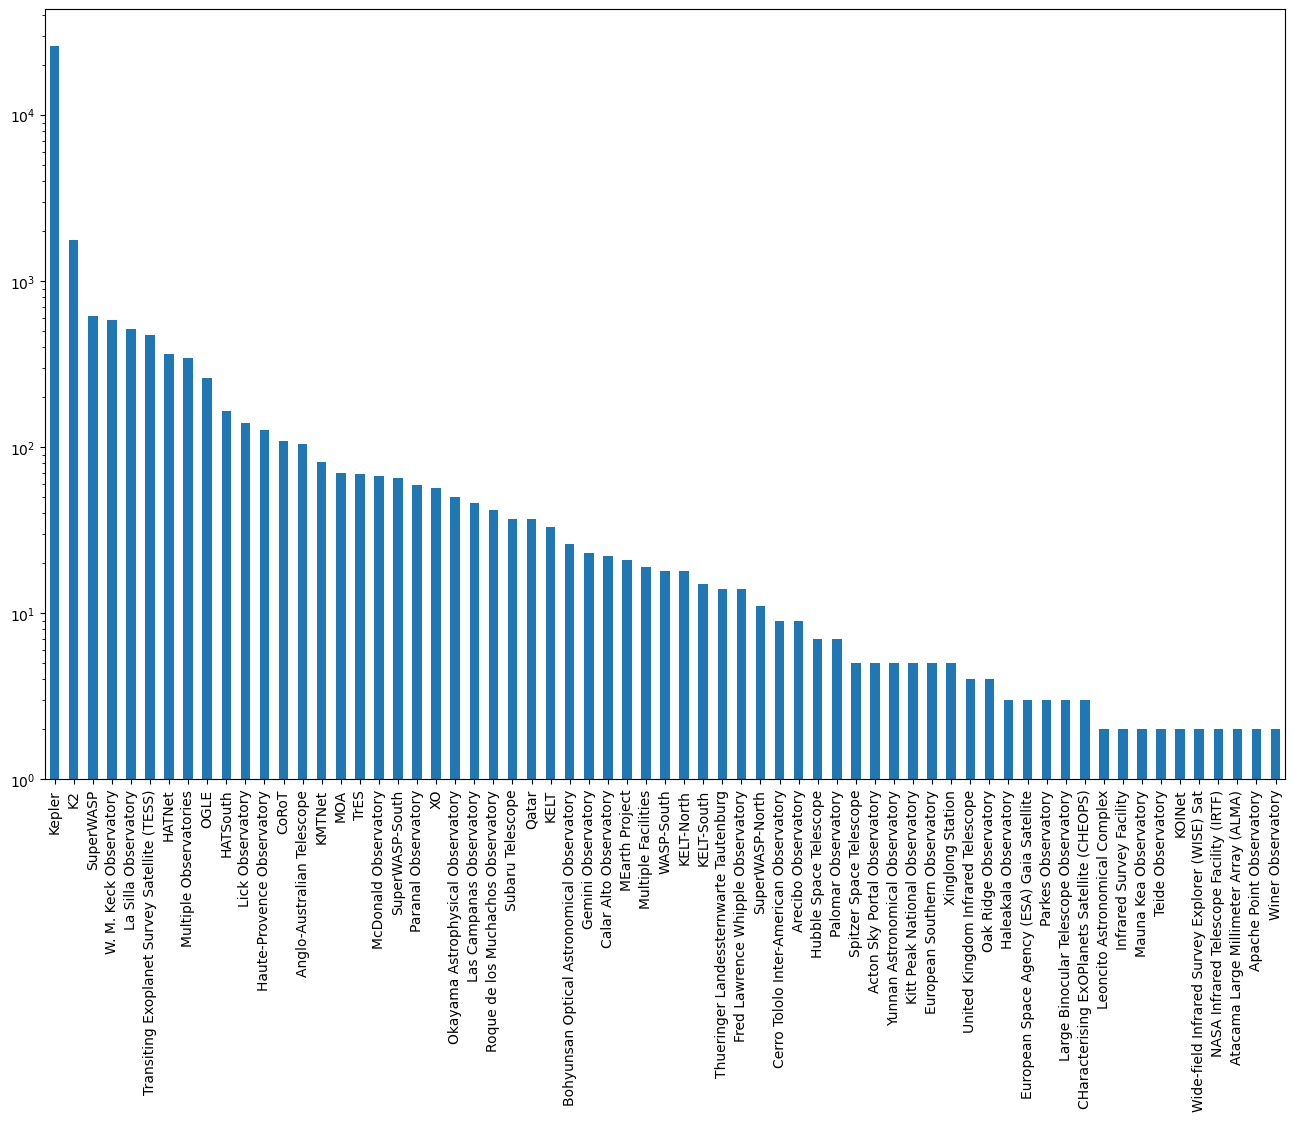

In [11]:
df_facility = exo_planet.disc_facility.value_counts()

fig1 , ax = plt.subplots(1,1,figsize = (16,10))
df_facility.plot.bar(log=True,ax=ax)

From above we see that Kepler is leading the exoplanet search by a considerable amount

<AxesSubplot:>

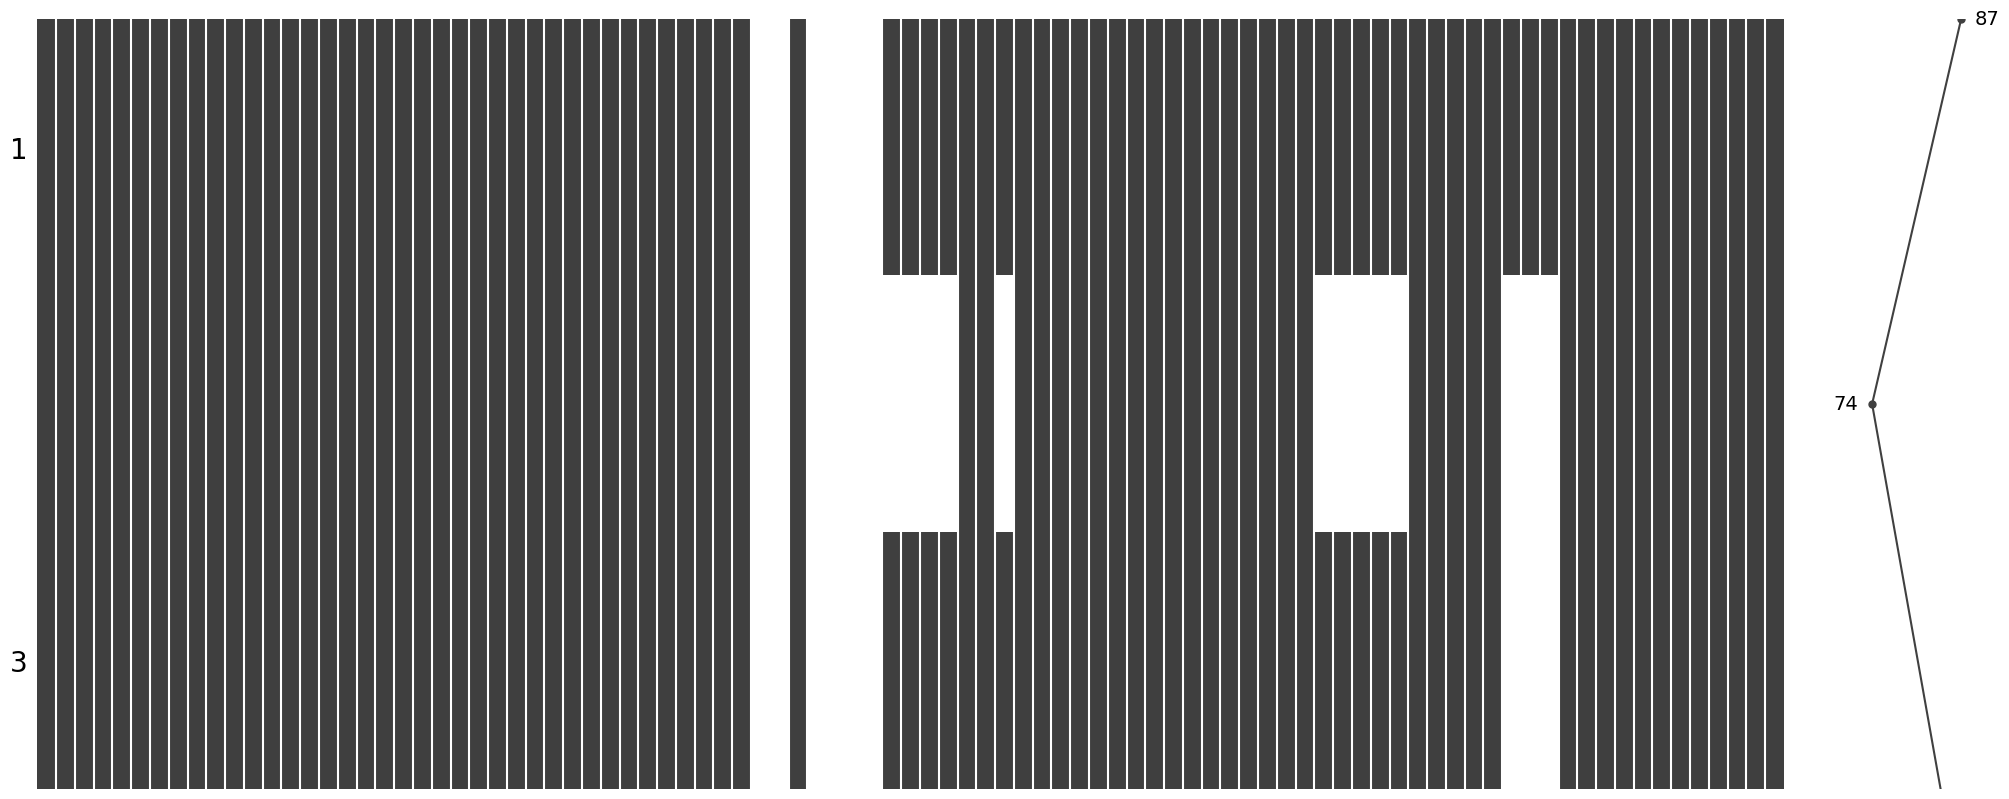

In [12]:
# Considering only kepler data

df_UK = exo_planet[exo_planet.disc_facility=='United Kingdom Infrared Telescope']
msno.matrix(df_UK)

<AxesSubplot:>

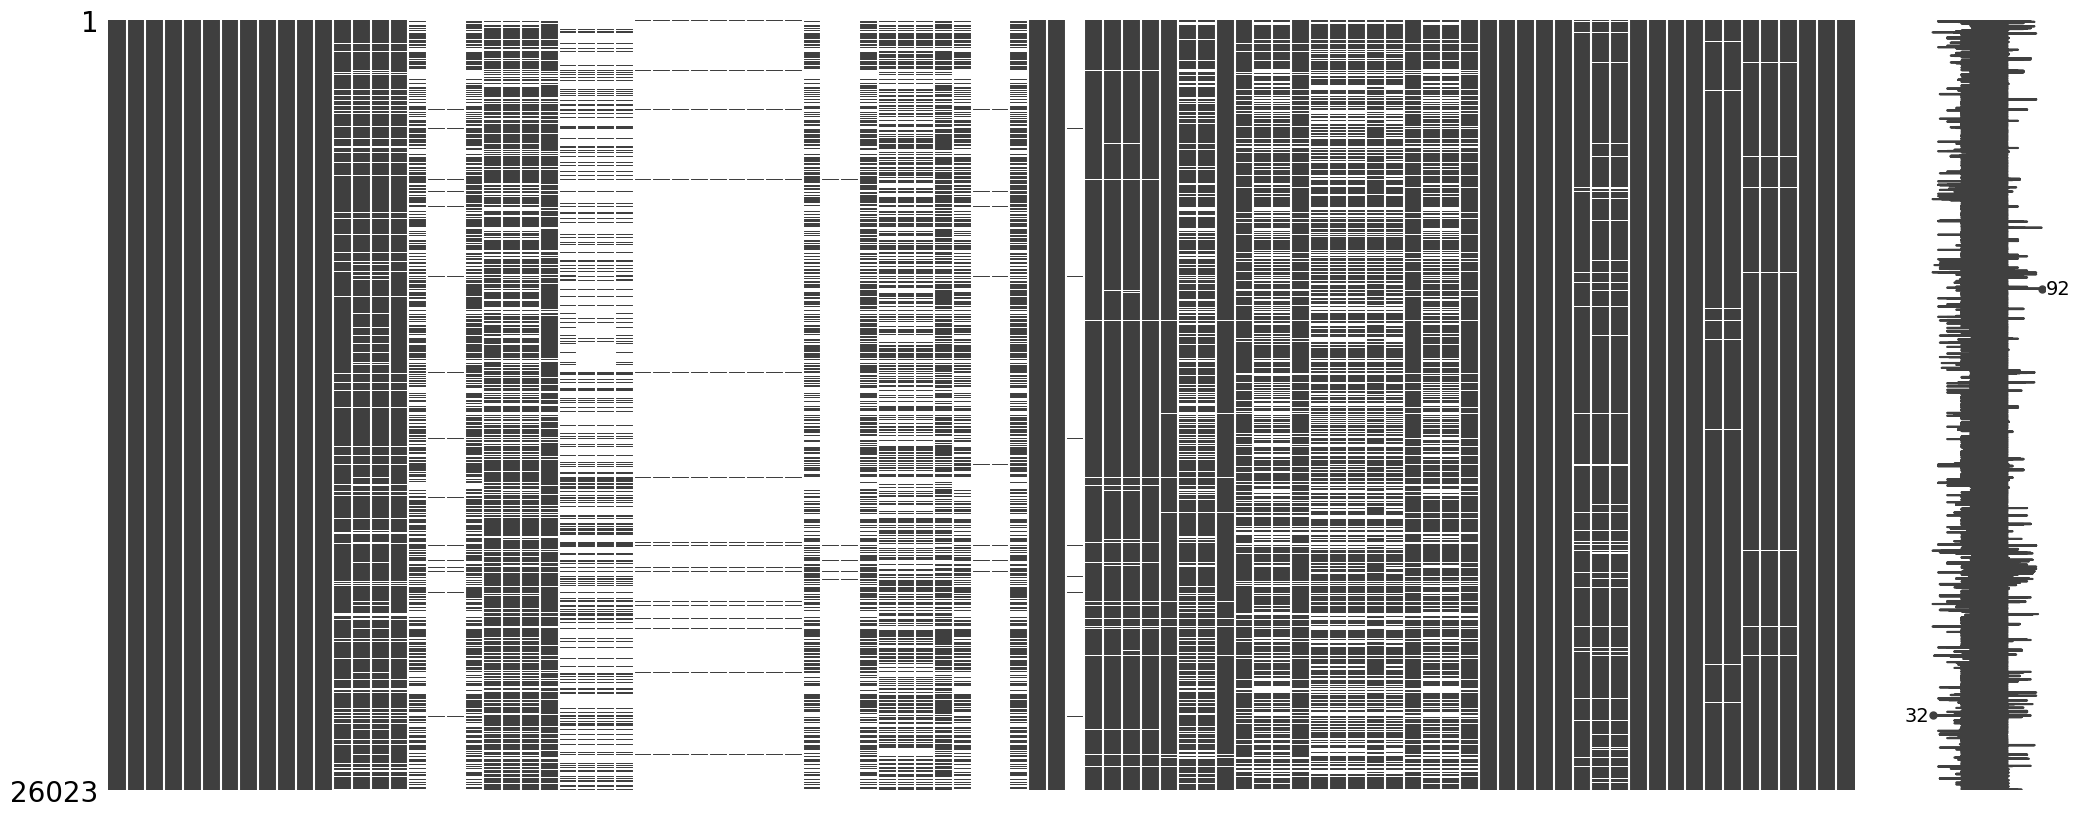

In [13]:

df_kepler = exo_planet[exo_planet.disc_facility=='Kepler']
msno.matrix(df_kepler)

Text(0.5, 0, 'discovery method')

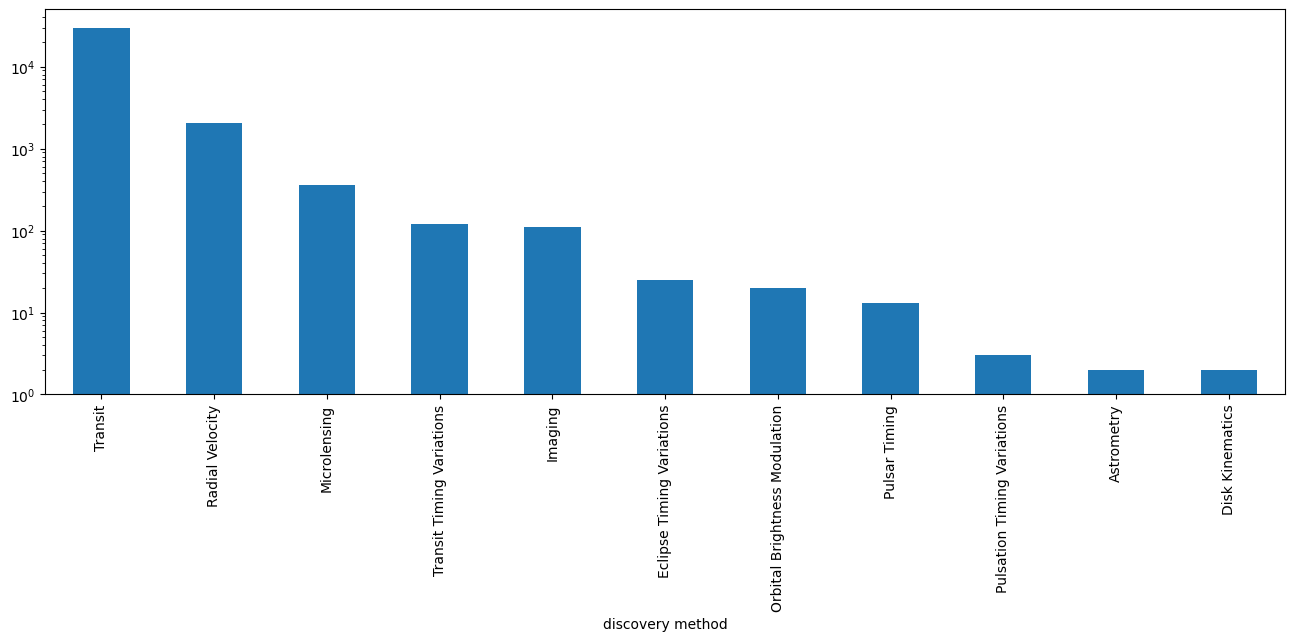

In [15]:
df_method = exo_planet.discoverymethod.value_counts()
fig1, ax = plt.subplots(1,1,figsize=(16, 5),dpi=100)
df_method.plot.bar(log=True,ax=ax)
ax.set_xlabel('discovery method')

### Inference
​
#### Transit method (MAJORITY!)
​
It seems transit method dominates the discovery of exoplanet. In transit method, the planet transits in the region between the observatory on earth and 
the parent star of the exo-planet. This process causes dimming of the parent star's brightness and thus we discover an exo-planet. Simple method yet
works most of the time. No wonder, the transit method dominates others by atleast a log scale. A nice article on this method 
[https://exoplanets.nasa.gov/faq/31/whats-a-transit/](http://)
​
#### Radial Velocity method
​
In radial velocity method, we look for star to wobble (due to planets gravitational pull) and thus creating a Doppler shift in the star's spectral line. 
[https://www.universetoday.com/138014/radial-velocity-method/](http://)
​
#### Microlensing
​
The presence of a large body like exo-planet will bend space-time creating a gravitational lens that will impact the light reaching the observatory from its parent
star. Due to lensing effect, we might see that star momentarily becomes brighter than its usual. This change in brightness is due to lens focusing caused by exo-planet. [https://en.wikipedia.org/wiki/Gravitational_microlensing](http://)
​
#### Other methods
​
We do not describe other methods as they did not contribute enough towards exo-planet discovery.
​

Text(0.5, 0, 'discovery year')

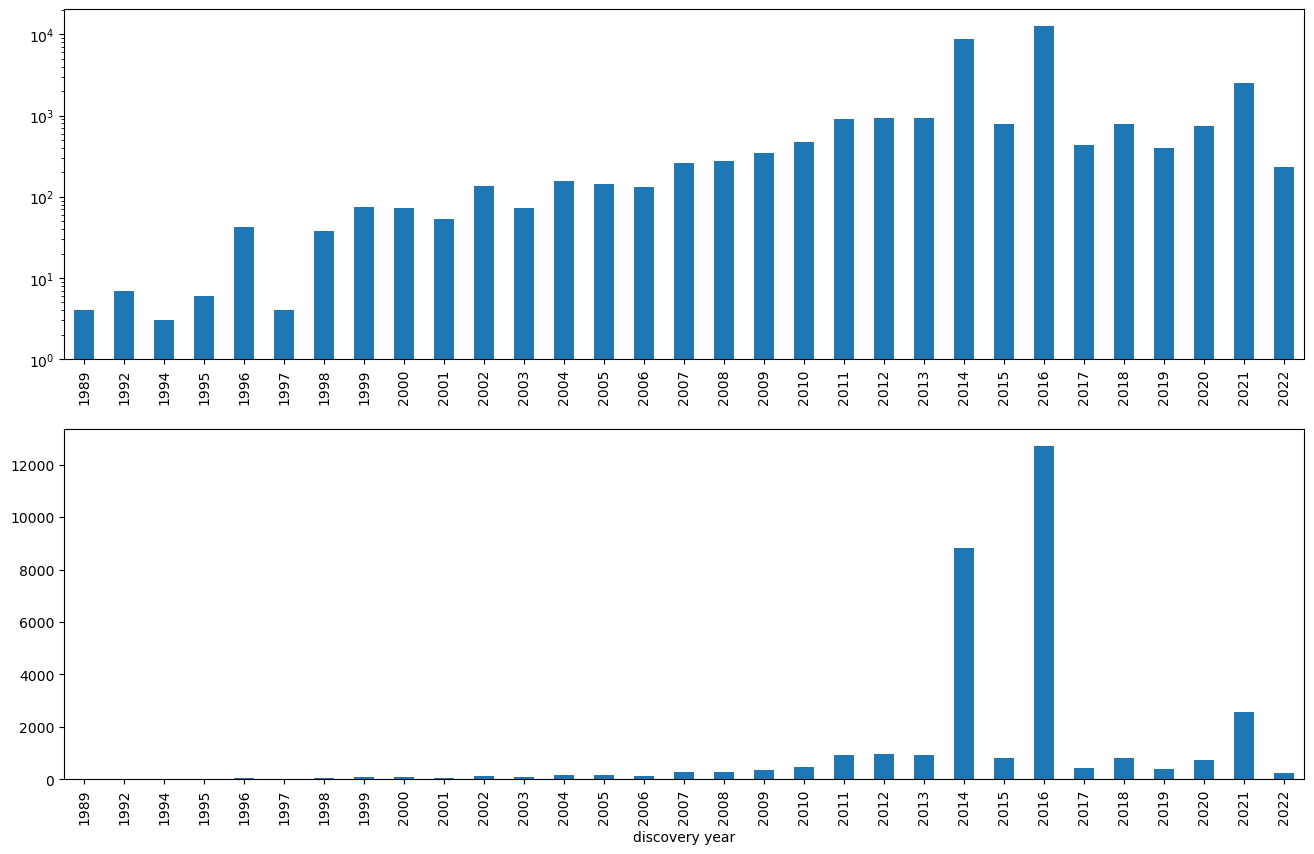

In [17]:
df_year = exo_planet.disc_year.value_counts();
df_year = df_year.sort_index(); # lets move forward in time
# count plot of discovery year
import matplotlib.pyplot as plt
fig1, ax = plt.subplots(2,1,figsize=(16, 10),dpi=100)
df_year.plot.bar(log=True,ax=ax[0]);
df_year.plot.bar(log=False,ax=ax[1]);
ax[1].set_xlabel('discovery year')

# Did Aliens contact us in 2014 and visited us in 2016 ?

### Inference

- I plot no. of discovery of exoplanets by year on log and linear y-axis. Whats strange is 2014 and 2016 has a large number of entries in the data.
- Was any new technology was invented or new observatory installed ? or did Aliens visited us ?
- Anyway, it is always pleasing for eyes to see such data peaks (2014 and 2016), this is what makes visualizing data a pleasure. 


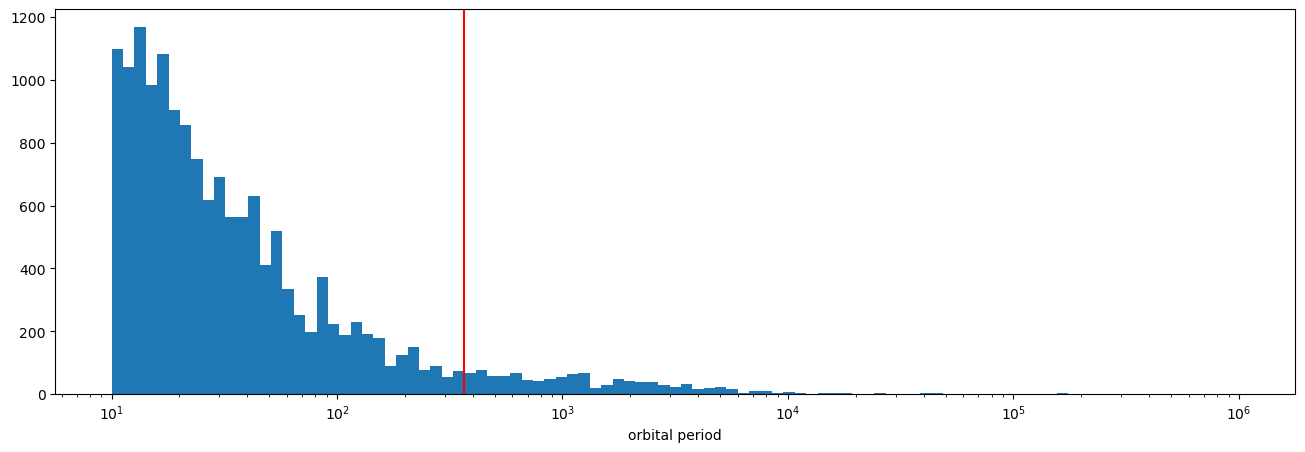

In [18]:
df_orbital = exo_planet.pl_orbper;
fig, ax = plt.subplots(figsize=(16, 5),dpi=100)
ax.hist(df_orbital, bins=np.logspace(start=np.log10(10), stop=np.log10(1e6), num=100))
plt.gca().set_xscale("log")
ax.set_xlabel('orbital period');
ax.axvline(x=365,color='r'); # earths orbit


### Inference

- The above plot tells us that most of the planets discovered has an orbit less than that of Earth.
- In otherwords, if aliens look at us, mostly they see mercury or venus affecting our sun rather than pluto.
- Surprisingly, scientist have also discovered larger orbital planets as large as 10000 days. I suspect these must be gas giants like
  jupiter which may be far from their star but gravitationally its impact is stronger. In otherwords, Jupiter has more impact on sun
  and easier to detect for an alien than to detect earth's impact on sun.
- One might separate the planets into classes based on orbital period and discovery method and see if we can see clustering.

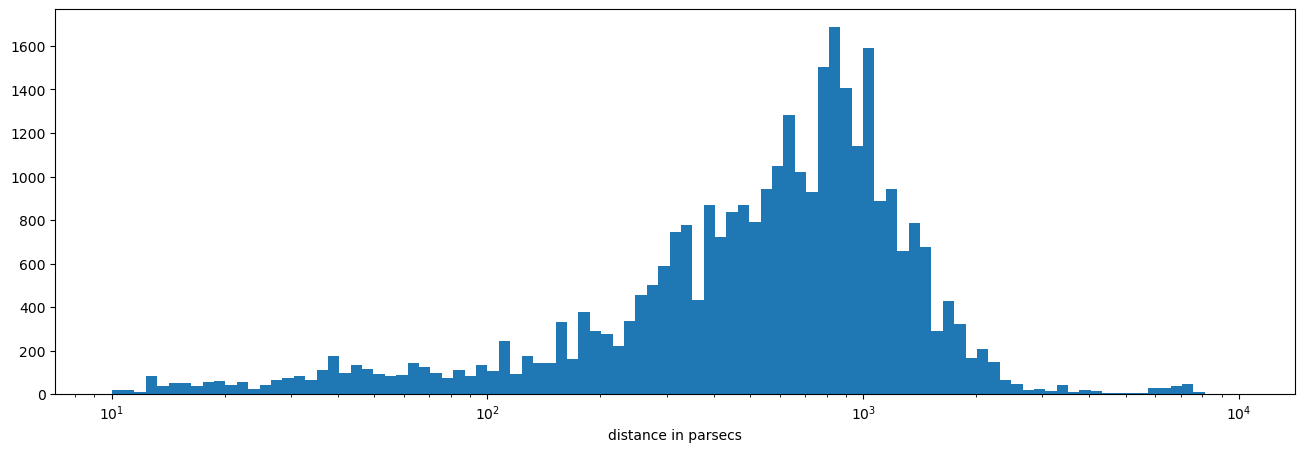

In [19]:
df_distance = exo_planet.sy_dist; # distance is given in parsecs units in the column sy_dist
fig, ax = plt.subplots(figsize=(16, 5),dpi=100)
ax.hist(df_distance, bins=np.logspace(start=np.log10(10), stop=np.log10(1e4), num=100))
plt.gca().set_xscale("log")
ax.set_xlabel('distance in parsecs');

### comments

- 1 Parsec = 3.086e+13 km
- Most of the planets discovered are on average 1000 Parsecs in distance from earth.

### Visualizing temperatures of Planet and Star

#### definitions

##### Equilibrium Temperature of a Planet

- If a planet is treated as a blackbody and its only heating source is the parent star, the surface temperature of the planet
  could be modeled from black body radiation theory. [https://en.wikipedia.org/wiki/Planetary_equilibrium_temperature](http://)
- This information is given in the column pl_eqt
 
##### Stellar Effective Temperature 

- From wiki: The effective temperature of a star or planet is the temperature of a black body that would emit the same total 
  amount of electromagnetic radiation.[https://en.wikipedia.org/wiki/Effective_temperature](http://).
- This information is given in the column st_teff



Text(0.5, 1.0, 'mean star temp = 5618.34[k]')

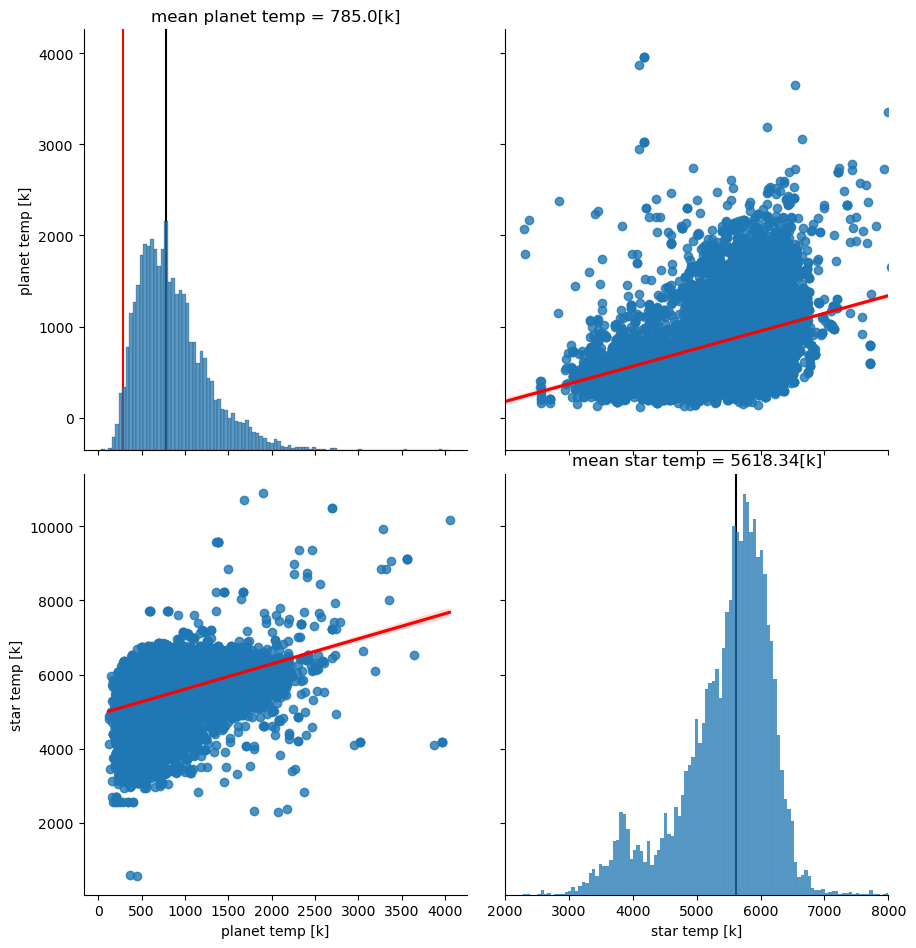

In [20]:
df_temperature = exo_planet.loc[:,['pl_eqt','st_teff']];
# median temperatures
avg_planet = df_temperature.pl_eqt.median();
avg_star   = df_temperature.st_teff.median();
pp = sns.pairplot(data=df_temperature,kind="reg", plot_kws={'line_kws':{'color':'red'}});
pp.axes[0,1].set_xlim((2000,8000));
pp.axes[1,1].set_xlim((2000,8000));
pp.fig.set_size_inches(10,10)
pp.axes[0,0].set_ylabel('planet temp [k]');
pp.axes[1,0].set_ylabel('star temp [k]');
pp.axes[1,0].set_xlabel('planet temp [k]');
pp.axes[1,1].set_xlabel('star temp [k]');
pp.axes[0,0].axvline(avg_planet,color='k');
pp.axes[0,0].axvline(288,color='r');
pp.axes[0,0].set_title('mean planet temp = '+str(avg_planet)+'[k]', fontsize=12) 
pp.axes[1,1].axvline(avg_star,color='k');
pp.axes[1,1].set_title('mean star temp = '+str(avg_star)+'[k]', fontsize=12) 


#### what we see?
​
- It is obvious that we see planet and star temperatures to be linearly correlated.
- However, we also see very few planets having temperature of 3000K while its
  star also has similar temperature. How could a star and planet have similar temperature ?
  Measurement error or extreme green house effect?
- The distribution of planet (plot: row=1,col=1) shows a right tailed distribution.
  Similarly the distribution of stars shows a left tailed distribution. This could be a 
  bias of observational method where it favors such properties or could also be the actual 
  distribution of exoplanets and their stars. Since I am not an astrophysicist, I could     
  only hypothesize the data.
- On average, exoplanets are 7 times cooler than their stars. However comparing earth, we 
  are 20 times cooler than sun at surface. 
- The red vertical line at row1 col1 subplot indicates 288K which is the surface 
  temperature of earth. Not many planets are earth like with respect to exoplanets
 

In [21]:
percentage_of_habitable = df_temperature[(df_temperature["pl_eqt"]<288+30) & (df_temperature["pl_eqt"]>288-50)].count()/df_temperature["pl_eqt"].count();
print("% of earthlike planet in term of temperature:"+str(100*percentage_of_habitable.pl_eqt))

% of earthlike planet in term of temperature:2.661235573659199


- Approximately, 2% of discovered exo-planets have plus or minus 50 degrees as that of 
  planet earth. So these are the planets that are interesting for us.
